## Problem Statement

Real estate firms often have to provide advice on the possible features in a residential property that would help fetch higher sale prices for their clients. This study is conducted in the role of an analyst working at an online property listing platform that connects home sellers with potential buyers. The website provides data-driven recommendations on price trends based on details of the listings to help users optimise their bid/sell prices. The company management would like to adopt a more data-driven approach to provide more customised recommendations to their users.

The aim of this study is to:

1) Create a regression model to predict home sale prices based on the listing details 

2) Recommend the top 5 features that can fetch higher sale prices for residential properties



## Datasets used
This study analyses the dataset of individual property transactions from Ames city, in the Iowa state of US, for the year of 2006 to 2010. This is a relatively rich dataset originally used for government tax assessment purposes. It has 80 variables and 2051 sales entries. Besides the sales prices, the dataset also captured details such as the size of the property, location, quality and condition of the house, and features such as garage, basement and kitchen, often with more than one variable for each feature. 

## Import Python modules

In [238]:
#import Python modules to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 
#import sklearn modules 
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from numbers import Number

## Import training dataset

In [454]:
#import training dataset and name as df
df = pd.read_csv('data/train.csv', keep_default_na=False, na_values="" )
df.head() #checking general appearance of dataset

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,138500


In [455]:
#overview of dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            2051 non-null   object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [456]:
#number of rows and columns
df.shape

(2051, 81)

##### Preliminary observations:
* Total of 2051 rows and 81 columns
* Data types are object, integer and float
* There are null values, as the number of non-null values do not match with 2051 in some columns
* Mix of capital and lowercase letters in column names, some consisting of words separated by spaces

#### Create a separate copy of dataframe for reference

In [457]:
#create a separate original dataframe for reference
df_copy = df.copy()
df_copy.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,138500


#### Renaming dataset columns

In [458]:
#Convert to snake case and renaming based on data dictionary for easier understanding
new_columns = {
    'Id': 'entry_id',
 'PID': 'land_parcel_id',
 'MS SubClass': 'dwelling_type',
 'MS Zoning': 'sale_zoning',
 'Lot Frontage': 'street_connected_length',
 'Lot Area': 'lot_area',
 'Street': 'road_access_type',
 'Alley': 'alley_access_type',
 'Lot Shape': 'lot_shape_regularity',
 'Land Contour': 'land_flatness',
 'Utilities': 'utilities_availability',
 'Lot Config': 'lot_config',
 'Land Slope': 'property_slope',
 'Neighborhood': 'neighborhood_location',
 'Condition 1': 'proximity_to_public_1',
 'Condition 2': 'proximity_to_public_2',
 'Bldg Type': 'building_type',
 'House Style': 'house_style',
 'Overall Qual': 'house_quality',
 'Overall Cond': 'house_condition',
 'Year Built': 'year_built',
 'Year Remod/Add': 'year_remodelled',
 'Roof Style': 'roof_style',
 'Roof Matl': 'roof_material',
 'Exterior 1st': 'exterior_material_1',
 'Exterior 2nd': 'exterior_material_2',
 'Mas Vnr Type': 'masonry_material',
 'Mas Vnr Area': 'masonry_area',
 'Exter Qual': 'exterior_build_quality',
 'Exter Cond': 'exterior_condition',
 'Foundation': 'foundation_type',
 'Bsmt Qual': 'basement_height_quality',
 'Bsmt Cond': 'basement_condition',
 'Bsmt Exposure': 'basement_exposure_rating',
 'BsmtFin Type 1': 'basement_finished_rating',
 'BsmtFin SF 1': 'basement_finished_area',
 'BsmtFin Type 2': 'basement_finished_2_rating',
 'BsmtFin SF 2': 'basement_finished_2_area',
 'Bsmt Unf SF': 'basement_unfinished_area',
 'Total Bsmt SF': 'basement_total_area',
 'Heating': 'heating_type',
 'Heating QC': 'heating_quality_condition',
 'Central Air': 'aircon_present',
 'Electrical': 'electric_system_type',
 '1st Flr SF': 'first_floor_area',
 '2nd Flr SF': 'second_floor_area',
 'Low Qual Fin SF': 'low_qual_finished_area',
 'Gr Liv Area': 'above_ground_area',
 'Bsmt Full Bath': 'bathroom_basement_full_num',
 'Bsmt Half Bath': 'bathroom_basement_half_num',
 'Full Bath': 'bathroom_above_ground_full_num',
 'Half Bath': 'bathroom_above_ground_half_num',
 'Bedroom AbvGr': 'bedroom_above_ground_num',
 'Kitchen AbvGr': 'kitchen_above_ground_num',
 'Kitchen Qual': 'kitchen_quality_ord',
 'TotRms AbvGrd': 'total_rooms_above_ground',
 'Functional': 'home_functionality',
 'Fireplaces': 'fireplace_num',
 'Fireplace Qu': 'fireplace_quality',
 'Garage Type': 'garage_location',
 'Garage Yr Blt': 'garage_built_year',
 'Garage Finish': 'garage_finish_quality',
 'Garage Cars': 'garage_size_num_cars',
 'Garage Area': 'garage_size_area',
 'Garage Qual': 'garage_quality',
 'Garage Cond': 'garage_condition',
 'Paved Drive': 'paved_driveway_quality',
 'Wood Deck SF': 'deck_wood_area',
 'Open Porch SF': 'porch_wood_area',
 'Enclosed Porch': 'porch_enclosed_area',
 '3Ssn Porch': 'porch_three_season_area',
 'Screen Porch': 'porch_screen_area',
 'Pool Area': 'pool_area',
 'Pool QC': 'pool_quality',
 'Fence': 'fence_quality',
 'Misc Feature': 'misc_feature',
 'Misc Val': 'misc_feature_value',
 'Mo Sold': 'month_sold',
 'Yr Sold': 'year_sold',
 'Sale Type': 'transaction_type',
 'SalePrice': 'sale_price'
              }

In [459]:
#renaming columns with dictionary
df.rename(columns = new_columns, inplace = True)

#checking results of renaming columns
df.columns

Index(['entry_id', 'land_parcel_id', 'dwelling_type', 'sale_zoning',
       'street_connected_length', 'lot_area', 'road_access_type',
       'alley_access_type', 'lot_shape_regularity', 'land_flatness',
       'utilities_availability', 'lot_config', 'property_slope',
       'neighborhood_location', 'proximity_to_public_1',
       'proximity_to_public_2', 'building_type', 'house_style',
       'house_quality', 'house_condition', 'year_built', 'year_remodelled',
       'roof_style', 'roof_material', 'exterior_material_1',
       'exterior_material_2', 'masonry_material', 'masonry_area',
       'exterior_build_quality', 'exterior_condition', 'foundation_type',
       'basement_height_quality', 'basement_condition',
       'basement_exposure_rating', 'basement_finished_rating',
       'basement_finished_area', 'basement_finished_2_rating',
       'basement_finished_2_area', 'basement_unfinished_area',
       'basement_total_area', 'heating_type', 'heating_quality_condition',
       'airco

## Processing null values and 0s

In [460]:
#looking at the proportion of null values in each column
df.isnull().mean().sort_values(ascending = False).head(10)

street_connected_length       0.160897
garage_built_year             0.055583
masonry_material              0.010726
masonry_area                  0.010726
basement_exposure_rating      0.001950
basement_finished_2_rating    0.000975
bathroom_basement_full_num    0.000975
bathroom_basement_half_num    0.000975
garage_condition              0.000488
basement_height_quality       0.000488
dtype: float64

Proportion of null values look reasonable. Looking at the data dictionary, 'NA' is used to indicate absence of a feature in categorical fields. We should also search for 'NA' in addition to null values.

#### Checking for 'NA'

In [461]:
#checking number of columns with NA
df.isin(['NA']).any().sum() #14 columns have NA 

14

There are 14 columns containing NA.

In [462]:
#find columns containing NA
for col in df.columns:
    if df[col].isin(['NA']).sum() > 0:
        print(col)

alley_access_type
basement_height_quality
basement_condition
basement_exposure_rating
basement_finished_rating
basement_finished_2_rating
fireplace_quality
garage_location
garage_finish_quality
garage_quality
garage_condition
pool_quality
fence_quality
misc_feature


The above are all columns with categorical data.

#### Replace 'NA' with np.NaN

In [463]:
#replace NA with np.NaN 
df = df.replace('NA', np.NaN)
df

,entry_id,land_parcel_id,dwelling_type,sale_zoning,street_connected_length,lot_area,road_access_type,alley_access_type,lot_shape_regularity,land_flatness,...,porch_screen_area,pool_area,pool_quality,fence_quality,misc_feature,misc_feature_value,month_sold,year_sold,transaction_type,sale_price
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000


In [464]:
#checking that there are no more 'NA'
df.isin(['NA']).any().sum() #returns 0

0

#### Drop columns with too many null values (< 80% non-null values)

In [465]:
#looking at the proportion of null values in each column again
df.isnull().mean().sort_values(ascending = False).head(10)

pool_quality               0.995612
misc_feature               0.968308
alley_access_type          0.931741
fence_quality              0.804973
fireplace_quality          0.487567
street_connected_length    0.160897
garage_finish_quality      0.055583
garage_quality             0.055583
garage_built_year          0.055583
garage_condition           0.055583
dtype: float64

Some columns have large proportions of null values. For this project, we set the threshold to keep a column at minimally 80% non-null values. 

In [466]:
#columns with >20% null values #to be dropped later
for col in df.columns:
    if df[col].isnull().mean() >= 0.2:
        print(col)

alley_access_type
fireplace_quality
pool_quality
fence_quality
misc_feature


In [467]:
#dropping columns with more than 20% null values
df = df.loc[:, df.isnull().mean() < 0.20]

In [468]:
#checking number of columns left 
df.shape[1] #76 columns left #5 dropped

76

In [469]:
#check remaining columns for proportion of nulls 
df.isnull().mean().sort_values(ascending = False).head() #all below 20% null values

street_connected_length    0.160897
garage_built_year          0.055583
garage_finish_quality      0.055583
garage_quality             0.055583
garage_condition           0.055583
dtype: float64

5 columns with more than 20% null values have been dropped.

#### Checking for 0 value

While NA is used to indicate absence of a feature in categorical fields, continuous fields of the same feature should carry the value of 0. The portion of 0 in each column should be checked as well.

In [470]:
df.eq(0).any().sum() #23 columns contain 0s

23

In [471]:
df.eq(0).mean().sort_values(ascending = False) 

pool_area                     0.995612
porch_three_season_area       0.987323
low_qual_finished_area        0.983910
misc_feature_value            0.968308
bathroom_basement_half_num    0.937591
                                ...   
exterior_material_1           0.000000
roof_material                 0.000000
roof_style                    0.000000
year_remodelled               0.000000
sale_price                    0.000000
Length: 76, dtype: float64

Some columns contain a large proportion of 0 value. 

In [472]:
#checking for columns with proportion of '0' >= 20% 
for col in df.columns:
    if df[col].eq(0).sum() >= 0.20:
        print(col)

masonry_area
basement_finished_area
basement_finished_2_area
basement_unfinished_area
basement_total_area
second_floor_area
low_qual_finished_area
bathroom_basement_full_num
bathroom_basement_half_num
bathroom_above_ground_full_num
bathroom_above_ground_half_num
bedroom_above_ground_num
kitchen_above_ground_num
fireplace_num
garage_size_num_cars
garage_size_area
deck_wood_area
porch_wood_area
porch_enclosed_area
porch_three_season_area
porch_screen_area
pool_area
misc_feature_value


#### Drop columns with too many zero values (< 80% non-zero values)

In [473]:
df = df.loc[:, df.eq(0).mean() <= 0.20]

In [474]:
#checking proportion of 0 in remaining columns
df.eq(0).mean().sort_values(ascending = False).head() #all proportions of '0' less than 0.20

basement_unfinished_area          0.080449
garage_size_area                  0.055095
garage_size_num_cars              0.055095
basement_total_area               0.026329
bathroom_above_ground_full_num    0.003901
dtype: float64

In [475]:
df.shape[1] #60 columns left

60

16 columns with 20% or more '0' value have been dropped.

## Dropping entry_id and land_parcel_id columns

* Based on the data dictionary, entry_id and land_parcel_id are identifiers for each sale entry, and do not have any impact on sale price. They can be used to check if there are any duplicate rows. If there are no duplicate entries, these two columns can be removed.  
* The information captured in 'dwelling_type' is duplicated in other columns such as 'year_built' and 'building_type. This column will be dropped too. 

In [476]:
#checking for duplicate ids
checking = ['entry_id' , 'land_parcel_id']
for col in checking:    
    if df[col].nunique() < df.shape[0]:
        print(col) #displays column with duplicated values

There are no duplicate ids. 

In [477]:
len(df.columns)

60

In [478]:
#dropping columns
df.drop(columns=['entry_id' , 'land_parcel_id', 'dwelling_type'], inplace = True)

In [479]:
#checking 3 columns have been dropped
len(df.columns) #reduced from 60 to 57

57

## Keep only rows of sales classified as residential

Examining the zoning classifications (under column header 'sale_zoning'):

* A : Agriculture
* C : Commercial
* FV: Floating Village Residential
* I : Industrial
* RH : Residential High Density
* RL : Residential Low Density
* RP : Residential Low Density Park
* RM : Residential Medium Density

Sales classified Agriculture, Commercial and Industrial (A (agr), C (all) and I (all)) should be removed.

In [480]:
 #checking for null values in 'sale_zoning'
df['sale_zoning'].isnull().sum() #returns 0

0

In [481]:
#checking for sales zoned under Agriculture, Commercial and Industrial ('A (agr)', 'C (all)', 'I (all)')
df['sale_zoning'].isin(['A (agr)', 'C (all)', 'I (all)']).sum() # returns 22

22

22 non-residential sales to be removed

In [482]:
#checking for sales zoned under RH, RL, RP, RM and FV
df['sale_zoning'].isin(['RH', 'RL', 'RP', 'RM', 'FV']).sum() #returns 2029 

2029

Expecting 2029 rows after non-residential sales removed

In [483]:
# keeping only residential properties
df = df[df['sale_zoning'].isin(['RH', 'RL', 'RP', 'RM', 'FV'])]
df.shape #2029 rows left

(2029, 57)

Only residential properties left in the dataset.

## Drop columns with large proportion of same values (> 80%)

In [484]:
#find columns which have more than 80% of the same value
too_many_same = []
for col in df.columns:
    for item in df[col].value_counts()/len(df[col]):
        if item >= 0.80:
            too_many_same.append(col)
            print(col, item)
len(too_many_same) #20 columns

road_access_type 0.9985214391325776
land_flatness 0.8999507146377526
utilities_availability 0.9995071463775259
property_slope 0.9536717594874322
proximity_to_public_1 0.8629866929521932
proximity_to_public_2 0.9876786594381469
building_type 0.8279940857565303
roof_material 0.9871858058156727
exterior_condition 0.8708723509117792
basement_condition 0.8969935929029078
basement_finished_2_rating 0.8531296205027107
heating_type 0.984228684080828
aircon_present 0.9379004435682602
electric_system_type 0.9147363233119763
kitchen_above_ground_num 0.9561360275998029
home_functionality 0.9354361754558896
garage_quality 0.897486446525382
garage_condition 0.9152291769344505
paved_driveway_quality 0.9142434696895022
transaction_type 0.8693937900443568


20

In [485]:
#drop columns with too many same values #21 dropped
df = df.drop(columns = too_many_same) 

In [486]:
df.shape #37 columns left

(2029, 37)

In [487]:
#check remaining columns
df.columns

Index(['sale_zoning', 'street_connected_length', 'lot_area',
       'lot_shape_regularity', 'lot_config', 'neighborhood_location',
       'house_style', 'house_quality', 'house_condition', 'year_built',
       'year_remodelled', 'roof_style', 'exterior_material_1',
       'exterior_material_2', 'masonry_material', 'exterior_build_quality',
       'foundation_type', 'basement_height_quality',
       'basement_exposure_rating', 'basement_finished_rating',
       'basement_unfinished_area', 'basement_total_area',
       'heating_quality_condition', 'first_floor_area', 'above_ground_area',
       'bathroom_above_ground_full_num', 'bedroom_above_ground_num',
       'kitchen_quality_ord', 'total_rooms_above_ground', 'garage_location',
       'garage_built_year', 'garage_finish_quality', 'garage_size_num_cars',
       'garage_size_area', 'month_sold', 'year_sold', 'sale_price'],
      dtype='object')

## Removing sale_price outliers

In [488]:
# calculate the Q1, Q3 & IQR
q1 = df['sale_price'].quantile(0.25)
q3 = df['sale_price'].quantile(0.75)
#mean_sp = df['sale_price'].mean()
#std_sp = train_data['sale_price'].std()
iqr = q3 - q1

In [489]:
#searching for outliers in sale_price +1.5IQR
(df['sale_price'] > (q3 + 1.5*iqr)).sum() #92 rows to be dropped

92

In [490]:
#searching for outliers in sale_price - 1.5IQR
(df['sale_price'] < (q1 - 1.5*iqr)).sum() #0 rows

0

In [491]:
#keep sales data below 3sd
df = df.loc[df['sale_price'] < (q3 + 1.5*iqr)]

In [492]:
df.shape #1937 rows left

(1937, 37)

### Create age variables

#### Visualising impact of month and year on sales and sale prices

array([[<AxesSubplot:title={'center':'month_sold'}>]], dtype=object)

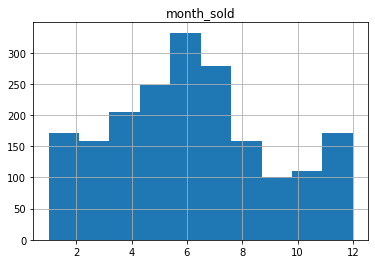

In [493]:
#number of sales by month
df[['month_sold']].hist()

In [494]:
df[['month_sold']].value_counts()

month_sold
6             332
7             279
5             248
4             205
3             159
8             159
10            110
9             101
2             100
11             96
12             76
1              72
dtype: int64

array([[<AxesSubplot:title={'center':'year_sold'}>]], dtype=object)

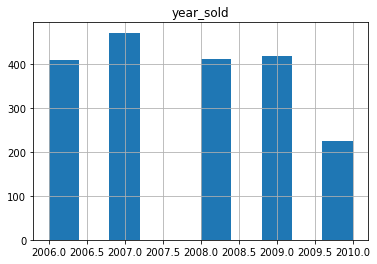

In [495]:
df[['year_sold']].hist()

Number of property sales remained similar from 2006 to 2009, but experienced a sharp drop in 2010.

Text(0.5, 1.0, 'Variation in sale price by year across 2006-2010')

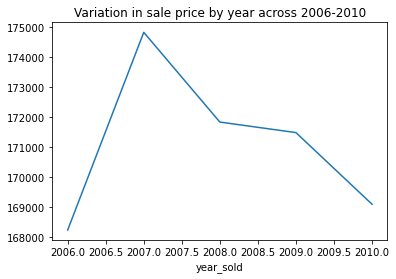

In [496]:
df.groupby(by = 'year_sold')['sale_price'].mean().plot().set_title('Variation in sale price by year across 2006-2010')

Sale prices increased from 2006 to 2007, but decreased from 2007 to 2010.

<AxesSubplot:title={'center':'Variation in sale price by month across 2006-2010'}, xlabel='month_sold'>

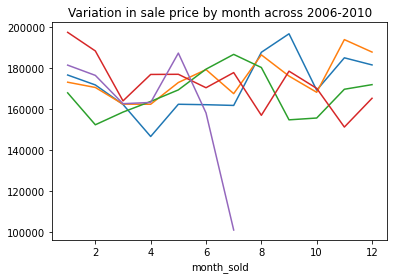

In [497]:
#fig, ax = plt.subplots(2,3, figsize=(15, 10)) 

df[df['year_sold'] == 2006].groupby(by = 'month_sold')['sale_price'].mean().plot().set_title('Variation in sale price by month across 2006-2010')
#plt.setp(ax[0][0].get_xticklabels(), fontsize=14)

df[df['year_sold'] == 2007].groupby(by = 'month_sold')['sale_price'].mean().plot()
#plt.setp(ax[0][1].get_xticklabels(), fontsize=14)

df[df['year_sold'] == 2008].groupby(by = 'month_sold')['sale_price'].mean().plot()
#plt.setp(ax[1][0].get_xticklabels(), fontsize=14)

df[df['year_sold'] == 2009].groupby(by = 'month_sold')['sale_price'].mean().plot()
#plt.setp(ax[1][1].get_xticklabels(), fontsize=14)

df[df['year_sold'] == 2010].groupby(by = 'month_sold')['sale_price'].mean().plot()
#plt.setp(ax[2][0].get_xticklabels(), fontsize=14)


* Sales in Mar and Apr tend to experience a dip in prices.
* From 2006 to 2007, mean sale price increased.
* From 2007 - 2010, the mean sale price visibly decreased. This is likely due to the global financial crisis in 2007-2008 that likely impacted macroeconomic conditions and thus property sale prices thereafter.  

#### Create age_built variable

* The age of a building is a reasonable consideration in assessing the sale price. Typically the sale price goes down with increase in age of a building.

In [498]:
#checking year_built and year_sold data
df['year_built'].describe()
df['year_sold'].describe()

count    1937.000000
mean     2007.783170
std         1.312868
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: year_sold, dtype: float64

In [499]:
#new column, age_built, using year_sold - year_built
df['age_built'] = df['year_sold'] - df['year_built']

In [500]:
#checking age_built column
df['age_built'].describe()

count    1937.000000
mean       36.967475
std        29.686333
min        -1.000000
25%         8.000000
50%        35.000000
75%        55.000000
max       136.000000
Name: age_built, dtype: float64

There is a house with a -1 age, which is not possible. To replace it with minimal value of 0.

In [501]:
#change negative age to 0
df.loc[df['age_built'] == -1, ['age_built']] = 0

In [502]:
#checking that negative age removed
df['age_built'].value_counts()
df['age_built'].describe()

count    1937.000000
mean       36.967992
std        29.685681
min         0.000000
25%         8.000000
50%        35.000000
75%        55.000000
max       136.000000
Name: age_built, dtype: float64

#### Create age_remodelled variable

* Remodelling works carried out to a property tends to add value to a property and can be used to garner higher sale prices. 
* The value of remodelling works can reasonably be assumed to decrease with time. 
* The length of time between remodelling and property sale should have an impact on sale price.

In [503]:
#checking year_remodelled data 
df['year_remodelled'].describe()
df

,sale_zoning,street_connected_length,lot_area,lot_shape_regularity,lot_config,neighborhood_location,house_style,house_quality,house_condition,year_built,...,total_rooms_above_ground,garage_location,garage_built_year,garage_finish_quality,garage_size_num_cars,garage_size_area,month_sold,year_sold,sale_price,age_built
0,RL,NaN,13517,IR1,CulDSac,Sawyer,2Story,6,8,1976,...,6,Attchd,1976.0,RFn,2.0,475.0,3,2010,130500,34
1,RL,43.0,11492,IR1,CulDSac,SawyerW,2Story,7,5,1996,...,8,Attchd,1997.0,RFn,2.0,559.0,4,2009,220000,13
2,RL,68.0,7922,Reg,Inside,NAmes,1Story,5,7,1953,...,5,Detchd,1953.0,Unf,1.0,246.0,1,2010,109000,57
3,RL,73.0,9802,Reg,Inside,Timber,2Story,5,5,2006,...,7,BuiltIn,2007.0,Fin,2.0,400.0,4,2010,174000,4
4,RL,82.0,14235,IR1,Inside,SawyerW,1.5Fin,6,8,1900,...,6,Detchd,1957.0,Unf,2.0,484.0,3,2010,138500,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,RL,79.0,11449,IR1,Inside,Timber,1Story,8,5,2007,...,7,Attchd,2007.0,Fin,2.0,520.0,1,2008,298751,1
2047,RL,NaN,12342,IR1,Inside,Edwards,1Story,4,5,1940,...,4,Detchd,1961.0,Unf,2.0,539.0,3,2009,82500,69
2048,RL,57.0,7558,Reg,Inside,Crawfor,1.5Fin,6,6,1928,...,9,Detchd,1929.0,Unf,2.0,342.0,3,2009,177000,81
2049,RL,80.0,10400,Reg,Corner,NAmes,1Story,4,5,1956,...,6,Attchd,1956.0,Unf,1.0,294.0,11,2009,144000,53


<AxesSubplot:>

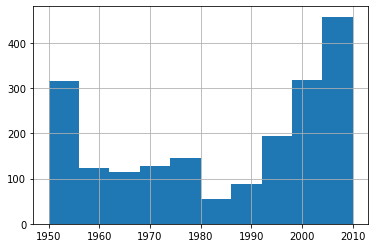

In [504]:
df['year_remodelled'].hist()

In [505]:
#creating age_remodelled variable
df['age_remodelled'] = df['year_sold'] - df['year_remodelled']

In [506]:
df['age_remodelled'].describe()

count    1937.000000
mean       24.258647
std        20.860410
min        -2.000000
25%         5.000000
50%        16.000000
75%        44.000000
max        60.000000
Name: age_remodelled, dtype: float64

There are age_remodelled values that are less than 0, which is not possible (min value is 0). To check and change these value to 0.

In [507]:
#checking rows with age_remodelled < 0
df.loc[df['age_remodelled'] < 0] #2 rows have age_remodelled of -1 and -2

,sale_zoning,street_connected_length,lot_area,lot_shape_regularity,lot_config,neighborhood_location,house_style,house_quality,house_condition,year_built,...,garage_location,garage_built_year,garage_finish_quality,garage_size_num_cars,garage_size_area,month_sold,year_sold,sale_price,age_built,age_remodelled
1719,RL,134.0,16659,IR1,Corner,NridgHt,2Story,8,5,2007,...,Detchd,2007.0,Unf,2.0,728.0,6,2007,260116,0,-1
1885,RL,128.0,39290,IR1,Inside,Edwards,1Story,10,5,2008,...,Attchd,2008.0,Fin,3.0,1154.0,10,2007,183850,0,-2


In [508]:
#change negative age to 0
df.loc[df['age_remodelled'] < 0, ['age_remodelled']] = 0

In [509]:
#checking there are no negative age values
df['age_remodelled'].value_counts()
df['age_remodelled'].describe()

count    1937.000000
mean       24.260196
std        20.858546
min         0.000000
25%         5.000000
50%        16.000000
75%        44.000000
max        60.000000
Name: age_remodelled, dtype: float64

#### Create has_remodelled variable

Some houses would not have undergone remodelling. As there are no null values in year_remodelled, it is likely that this is represented with year_remodelled == year_built. Presence of remodelling can be binarised.

In [510]:
#showing rows where remodelling year is same as built year #1084 rows
df[df['year_remodelled'] == df['year_built']][['year_built','year_remodelled']]

,year_built,year_remodelled
7,1959,1959
8,1952,1952
9,1969,1969
10,1971,1971
11,2005,2005
...,...,...
2040,1953,1953
2044,1995,1995
2046,2007,2007
2049,1956,1956


In [511]:
#presence of a row where remodelled year is earlier than year built, which is not possible
df[df['year_remodelled'] < df['year_built']][['year_built','year_remodelled']]

,year_built,year_remodelled
1003,2002,2001


In [512]:
#changing year remodelled to be equals to year built
df.loc[df['year_remodelled'] < df['year_built'], ['year_remodelled']] = 2002

In [513]:
#adding a column to indicate a house has undergone remodelling
df['has_remodelled'] = df['year_remodelled'] == df['year_built']

In [514]:
#checking results of creating 'has_remodelled' column
df['has_remodelled'].value_counts()

True     1053
False     884
Name: has_remodelled, dtype: int64

### Area of house

* We can reasonably assume that the larger the size of the house, the higher the sale price. 
* While we can calculate the total area of the house based on the sum of the above-ground and basement area, there is likely to be relatively high collinearity between total area and basement area. 
* To address this, we can use above-ground area and total basement area as two separate variables.

In [515]:
#checking for null values #none found
df['above_ground_area'].isnull().sum()

0

In [516]:
#checking above_ground_area variable
df['above_ground_area'].describe()

count    1937.000000
mean     1462.902943
std       462.388797
min       334.000000
25%      1120.000000
50%      1427.000000
75%      1694.000000
max      5642.000000
Name: above_ground_area, dtype: float64

In [517]:
df['above_ground_area'].value_counts()

864     25
1040    20
1092    19
1200    16
1456    15
        ..
2814     1
819      1
2119     1
2132     1
1804     1
Name: above_ground_area, Length: 990, dtype: int64

<AxesSubplot:>

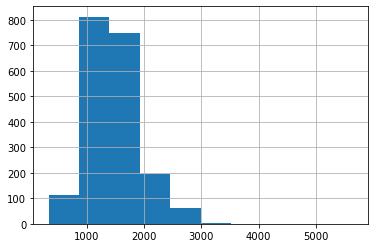

In [518]:
df['above_ground_area'].hist()

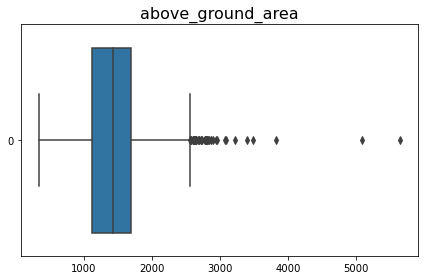

In [519]:
#boxplot of above_ground_area
ax = sns.boxplot(data=df['above_ground_area'], orient='h').set_title(
    'above_ground_area',fontsize=16)

plt.tight_layout()

#### Checking basement_total_area variable

In [520]:
#exploring basement variables
basement = ['basement_height_quality', 'basement_exposure_rating',
       'basement_finished_rating', 'basement_unfinished_area',
       'basement_total_area']

df[basement].head()

,basement_height_quality,basement_exposure_rating,basement_finished_rating,basement_unfinished_area,basement_total_area
0,TA,No,GLQ,192.0,725.0
1,Gd,No,GLQ,276.0,913.0
2,TA,No,GLQ,326.0,1057.0
3,Gd,No,Unf,384.0,384.0
4,Fa,No,Unf,676.0,676.0


In [521]:
#check for nulls in 'basement_total_area' variable
(df['basement_total_area'].isnull()).sum() #there is one null value

1

* Where a basement feature is not present in a house, the basement categorical categories would be indicated by a null value. 
* The basement total area should also be equals to 0. 

In [522]:
#checking row with null 'basement_total_area'
df[df['basement_total_area'].isnull()][basement]

,basement_height_quality,basement_exposure_rating,basement_finished_rating,basement_unfinished_area,basement_total_area
1327,NaN,NaN,NaN,NaN,NaN


For this row, all the other related basement variables have null values as well. This property has no basement. We should replace the NaN in basement_total_area with 0.

In [523]:
#replacing NaN with 0
df.loc[df['basement_total_area'].isnull(),'basement_total_area'] = 0

In [524]:
#checking for anymore null values #none left
df['basement_total_area'].isnull().sum()

0

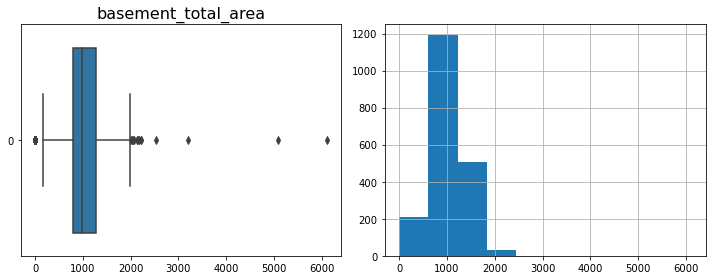

In [525]:
#visualising basement_total_area
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
ax = sns.boxplot(data=df['basement_total_area'], orient='h').set_title(
    'basement_total_area',fontsize=16)

plt.subplot(1,2,2)
df['basement_total_area'].hist()

plt.tight_layout()

In [526]:
df['basement_total_area'].describe()

count    1937.000000
mean     1025.855963
std       413.241100
min         0.000000
25%       784.000000
50%       981.000000
75%      1267.000000
max      6110.000000
Name: basement_total_area, dtype: float64

In [527]:
df['basement_total_area'].value_counts() #only 51 properties have no basement, too few to dummify as has_basement

864.0     51
0.0       51
672.0     20
1040.0    20
912.0     17
          ..
1704.0     1
1156.0     1
1039.0     1
1269.0     1
1884.0     1
Name: basement_total_area, Length: 826, dtype: int64

In [528]:
#checking status of columns
df.columns

Index(['sale_zoning', 'street_connected_length', 'lot_area',
       'lot_shape_regularity', 'lot_config', 'neighborhood_location',
       'house_style', 'house_quality', 'house_condition', 'year_built',
       'year_remodelled', 'roof_style', 'exterior_material_1',
       'exterior_material_2', 'masonry_material', 'exterior_build_quality',
       'foundation_type', 'basement_height_quality',
       'basement_exposure_rating', 'basement_finished_rating',
       'basement_unfinished_area', 'basement_total_area',
       'heating_quality_condition', 'first_floor_area', 'above_ground_area',
       'bathroom_above_ground_full_num', 'bedroom_above_ground_num',
       'kitchen_quality_ord', 'total_rooms_above_ground', 'garage_location',
       'garage_built_year', 'garage_finish_quality', 'garage_size_num_cars',
       'garage_size_area', 'month_sold', 'year_sold', 'sale_price',
       'age_built', 'age_remodelled', 'has_remodelled'],
      dtype='object')

### Exploring garage variables

In [529]:
#variables associated with garage
garage = ['garage_location', 'garage_built_year','garage_finish_quality', 'garage_size_num_cars', 'garage_size_area']

In [530]:
df[garage].isnull().sum()

garage_location          105
garage_built_year        106
garage_finish_quality    106
garage_size_num_cars       1
garage_size_area           1
dtype: int64

In [532]:
#checking this row of data with null value
df[df['garage_size_num_cars'].isnull()][garage]

,garage_location,garage_built_year,garage_finish_quality,garage_size_num_cars,garage_size_area
1712,Detchd,NaN,NaN,NaN,NaN


Without any other values to support, we cannot ascetain if the garage_location is an error entry. In this case, we assume that this property has no garage. 

In [533]:
#changing all garage values in row to null
df.loc[df['garage_size_num_cars'].isnull(), garage] = np.NaN

In [534]:
#checking proportion of null values in garage-related variables
df[garage].isnull().sum()

garage_location          106
garage_built_year        106
garage_finish_quality    106
garage_size_num_cars       1
garage_size_area           1
dtype: int64

In [535]:
#replacing nulls with 0
for col in garage:
    df.loc[df[col].isnull(), col] = 0

In [536]:
df[garage].isnull().sum() # no more null values

garage_location          0
garage_built_year        0
garage_finish_quality    0
garage_size_num_cars     0
garage_size_area         0
dtype: int64

In [537]:
#checking proportion of 0 values in garage-related variables
df[garage].eq(0).sum()

garage_location          106
garage_built_year        106
garage_finish_quality    106
garage_size_num_cars     106
garage_size_area         106
dtype: int64

The number of 0s and null rows in garage-related variables are the same (106). These are should be properties without garages, hence all associated values are 0.

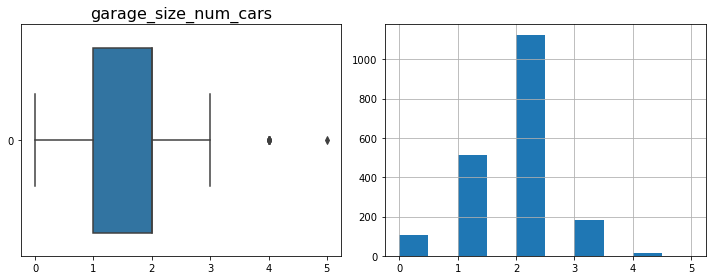

In [538]:
#visualising 'garage_size_num_cars'
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
ax = sns.boxplot(data=df['garage_size_num_cars'], orient='h').set_title(
    'garage_size_num_cars',fontsize=16)

plt.subplot(1,2,2)
df['garage_size_num_cars'].hist()

plt.tight_layout()

In [539]:
df['garage_size_num_cars'].value_counts() #1-5 cars
df['garage_size_num_cars'].describe()

count    1937.000000
mean        1.733092
std         0.732583
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: garage_size_num_cars, dtype: float64

In [540]:
#checking categories in garage_finish_quality
df['garage_finish_quality'].value_counts() 

Unf    836
RFn    555
Fin    440
0      106
Name: garage_finish_quality, dtype: int64

In [541]:
# Mapping numerical value to 'garage_finish_quality'
def garage_finish_quality_renum(x):
    if x == 'Fin' :
        return 3
    elif x == 'RFn':
        return 2
    elif x == 'Unf':
        return 1
    else:
        return 0

#mapping bathroom_above_ground_full_num
df['garage_finish_quality'] = df['garage_finish_quality'].map(garage_finish_quality_renum)

In [668]:
#checking garage_size_area
df['garage_size_area'].describe()

count    1937.000000
mean      459.909654
std       203.443412
min         0.000000
25%       312.000000
50%       473.000000
75%       576.000000
max      1418.000000
Name: garage_size_area, dtype: float64

### Creating garage_age

In [542]:
#checking number of rows with 'garage_built_year', i.e with garage
df['garage_built_year'].notnull().sum()

1937

In [543]:
df['garage_built_year'].describe()

count    1937.000000
mean     1869.453278
std       450.589036
min         0.000000
25%      1957.000000
50%      1977.000000
75%      2000.000000
max      2207.000000
Name: garage_built_year, dtype: float64

The row with garage_built_year of '2207' is likely a typo for 2007. 

In [544]:
#checking row with garage_built_year of '2207'
df[df['garage_built_year'] == 2207][['year_sold','garage_built_year', 'year_built']] #2207 is likely be a typo for 2007

,year_sold,garage_built_year,year_built
1699,2007,2207.0,2006


In [545]:
# changing garage_built_year of '2207' to 2007

df.loc[df['garage_built_year'] == 2207,'garage_built_year'] = 2007

In [546]:
#checking 2207 removed
(df['garage_built_year']== 2207).sum() # equals 0

0

In [547]:
#insert new column 'garage_age' filled with 0
df['garage_age'] = 0

In [548]:
#fill garage_age with values
df.loc[df['garage_built_year'].notnull(), 'garage_age'] = df['year_sold'] - df['garage_built_year']

In [549]:
#checking 'garage_age'
df['garage_age'].describe()
#df['garage_age'].max() #109
#df['garage_age'].min()

count    1937.000000
mean      138.433144
std       450.533723
min        -1.000000
25%         8.000000
50%        31.000000
75%        51.000000
max      2010.000000
Name: garage_age, dtype: float64

In [550]:
#exploring garage_location
df['garage_location'].value_counts()

Attchd     1140
Detchd      523
BuiltIn     113
0           106
Basment      26
2Types       19
CarPort      10
Name: garage_location, dtype: int64

As 'BuiltIn', 'Basment', '2Types', 'CarPort' have relatively lower numbers, we will group them into a new category called 'others'.

In [551]:
# Regrouping variables in 'garage_location'
def garage_location_renum(x):
    to_group = ['BuiltIn', 'Basment', '2Types', 'CarPort']
    if x in to_group:
        return 'others'
    else:
        return x
#mapping     
df['garage_location'] = df['garage_location'].map(garage_location_renum)

In [552]:
#checking regrouped garage_location
df['garage_location'].value_counts() #ok

Attchd    1140
Detchd     523
others     168
0          106
Name: garage_location, dtype: int64

In [553]:
#dummifying 'garage_location' 
df = pd.concat([df, pd.get_dummies(df[['garage_location']], drop_first = False)], axis=1) #4 columns created

Created 4 new columns: 'garage_location_Attchd', 'garage_location_Detchd', 'garage_location_others', 'garage_location_0'

In [554]:
df.columns

Index(['sale_zoning', 'street_connected_length', 'lot_area',
       'lot_shape_regularity', 'lot_config', 'neighborhood_location',
       'house_style', 'house_quality', 'house_condition', 'year_built',
       'year_remodelled', 'roof_style', 'exterior_material_1',
       'exterior_material_2', 'masonry_material', 'exterior_build_quality',
       'foundation_type', 'basement_height_quality',
       'basement_exposure_rating', 'basement_finished_rating',
       'basement_unfinished_area', 'basement_total_area',
       'heating_quality_condition', 'first_floor_area', 'above_ground_area',
       'bathroom_above_ground_full_num', 'bedroom_above_ground_num',
       'kitchen_quality_ord', 'total_rooms_above_ground', 'garage_location',
       'garage_built_year', 'garage_finish_quality', 'garage_size_num_cars',
       'garage_size_area', 'month_sold', 'year_sold', 'sale_price',
       'age_built', 'age_remodelled', 'has_remodelled', 'garage_age',
       'garage_location_0', 'garage_location_A

## Exploring number of bathrooms

In [555]:
#checking for nulls
df['bathroom_above_ground_full_num'].isnull().sum() #no null values

0

In [556]:
#checking values
df['bathroom_above_ground_full_num'].value_counts() #7 houses have no bathroom above ground

2    1018
1     879
3      32
0       6
4       2
Name: bathroom_above_ground_full_num, dtype: int64

In [557]:
df[df['bathroom_above_ground_full_num'] == 0] #no particular reason why there are no bathrooms above ground, so leave as is

,sale_zoning,street_connected_length,lot_area,lot_shape_regularity,lot_config,neighborhood_location,house_style,house_quality,house_condition,year_built,...,year_sold,sale_price,age_built,age_remodelled,has_remodelled,garage_age,garage_location_0,garage_location_Attchd,garage_location_Detchd,garage_location_others
191,RL,155.0,20064,IR1,Inside,ClearCr,1Story,8,6,1976,...,2007,279000,31,31,True,31.0,0,1,0,0
346,RL,NaN,10246,IR1,CulDSac,Sawyer,SLvl,4,9,1965,...,2006,145000,41,5,False,41.0,0,1,0,0
400,RL,64.0,7018,Reg,Inside,SawyerW,SFoyer,5,5,1979,...,2009,153337,30,30,True,30.0,0,0,1,0
744,RL,60.0,12900,Reg,Inside,Sawyer,SFoyer,4,4,1969,...,2008,108959,39,39,True,39.0,0,0,0,1
1280,RL,53.0,3922,Reg,Inside,Blmngtn,1Story,7,5,2006,...,2007,194201,1,0,False,1.0,0,1,0,0
1372,RL,NaN,10020,IR1,Inside,Edwards,1Story,1,1,1922,...,2009,61000,87,59,False,2009.0,1,0,0,0


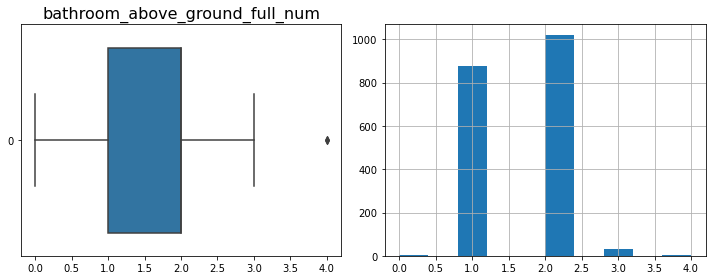

In [558]:
#visualising 'bathroom_above_ground_full_num'
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
ax = sns.boxplot(data=df['bathroom_above_ground_full_num'], orient='h').set_title(
    'bathroom_above_ground_full_num',fontsize=16)

plt.subplot(1,2,2)
df['bathroom_above_ground_full_num'].hist()

plt.tight_layout()

In [559]:
df['bathroom_above_ground_full_num'].value_counts()

2    1018
1     879
3      32
0       6
4       2
Name: bathroom_above_ground_full_num, dtype: int64

Most houses have either 1 or 2 bathrooms above ground. Can merge into 1 or less, and 2 or more.

In [560]:
# Merging above ground bathrooms to 2 categories: 1 or less, and 2 or more
# create new column called more_than_2_above_bathrooms
def bathroom_above_ground_full_num_renum(x):
    if x <= 1 :
        return 0
    elif x >= 2:
        return 1

#mapping bathroom_above_ground_full_num
df['more_than_2_above_bathrooms'] = df['bathroom_above_ground_full_num'].map(bathroom_above_ground_full_num_renum)

In [561]:
#checking values again
df['more_than_2_above_bathrooms'].value_counts() #correctly mapped to new column 'more_than_2_above_bathrooms'

1    1052
0     885
Name: more_than_2_above_bathrooms, dtype: int64

## Exploring bedrooms above ground

In [562]:
#checking for nulls
df['bedroom_above_ground_num'].isnull().sum() #no nulls

0

In [563]:
df['bedroom_above_ground_num'].value_counts() #some houses have no bedrooms above ground, which is weird

3    1072
2     504
4     236
1      70
5      38
6      12
0       4
8       1
Name: bedroom_above_ground_num, dtype: int64

In [564]:
#checking houses with missing room numbers
df[df['bedroom_above_ground_num'] == 0] #looks like values are simply missing 

,sale_zoning,street_connected_length,lot_area,lot_shape_regularity,lot_config,neighborhood_location,house_style,house_quality,house_condition,year_built,...,sale_price,age_built,age_remodelled,has_remodelled,garage_age,garage_location_0,garage_location_Attchd,garage_location_Detchd,garage_location_others,more_than_2_above_bathrooms
191,RL,155.0,20064,IR1,Inside,ClearCr,1Story,8,6,1976,...,279000,31,31,True,31.0,0,1,0,0,0
346,RL,NaN,10246,IR1,CulDSac,Sawyer,SLvl,4,9,1965,...,145000,41,5,False,41.0,0,1,0,0,0
744,RL,60.0,12900,Reg,Inside,Sawyer,SFoyer,4,4,1969,...,108959,39,39,True,39.0,0,0,0,1,0
1308,RL,41.0,4923,Reg,Inside,StoneBr,1Story,8,5,2001,...,286000,7,6,False,7.0,0,1,0,0,0


In [565]:
#impute missing room numbers with mean number of rooms
df.loc[df['bedroom_above_ground_num'] == 0,'bedroom_above_ground_num' ] = df['bedroom_above_ground_num'].mean() 

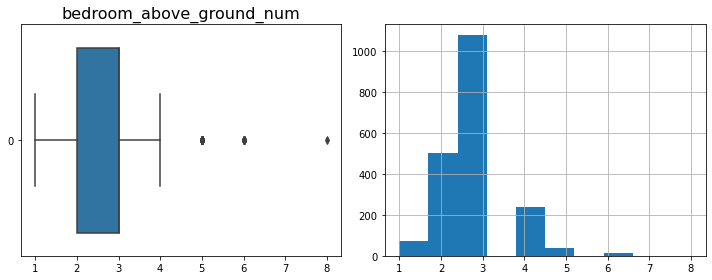

In [566]:
#visualising 'bedroom_above_ground_num'
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
ax = sns.boxplot(data=df['bedroom_above_ground_num'], orient='h').set_title(
    'bedroom_above_ground_num',fontsize=16)

plt.subplot(1,2,2)
df['bedroom_above_ground_num'].hist()

plt.tight_layout()

Number of bedrooms can be clustered into 3 groups: 2 or less, 3, and 4 or more

In [567]:
# Merging bedroom_above_ground_num into 3 groups: 2 or less, 3, and 4 or more
def bedroom_above_ground_num_renum(x): #x = 3 remains unchanged
    if x <= 2 :
        return 'two'
    elif x == 3:
        return 'three'
    elif x >= 4:
        return 'four'

#mapping bathroom_above_ground_full_num
df['bedroom_above_ground_num'] = df['bedroom_above_ground_num'].map(bedroom_above_ground_num_renum)

In [568]:
#check successful mapping 
df['bedroom_above_ground_num'].value_counts() 

three    1072
two       574
four      287
Name: bedroom_above_ground_num, dtype: int64

In [569]:
#dummifying 'bedroom_above_ground_num' 
df = pd.concat([df, pd.get_dummies(df[['bedroom_above_ground_num']], drop_first = False)], axis=1) #3 columns created

In [570]:
df.columns #checking newly created columns

Index(['sale_zoning', 'street_connected_length', 'lot_area',
       'lot_shape_regularity', 'lot_config', 'neighborhood_location',
       'house_style', 'house_quality', 'house_condition', 'year_built',
       'year_remodelled', 'roof_style', 'exterior_material_1',
       'exterior_material_2', 'masonry_material', 'exterior_build_quality',
       'foundation_type', 'basement_height_quality',
       'basement_exposure_rating', 'basement_finished_rating',
       'basement_unfinished_area', 'basement_total_area',
       'heating_quality_condition', 'first_floor_area', 'above_ground_area',
       'bathroom_above_ground_full_num', 'bedroom_above_ground_num',
       'kitchen_quality_ord', 'total_rooms_above_ground', 'garage_location',
       'garage_built_year', 'garage_finish_quality', 'garage_size_num_cars',
       'garage_size_area', 'month_sold', 'year_sold', 'sale_price',
       'age_built', 'age_remodelled', 'has_remodelled', 'garage_age',
       'garage_location_0', 'garage_location_A

## Exploring total rooms above ground

In [571]:
df['total_rooms_above_ground'].isnull().sum() #no nulls

0

In [572]:
df['total_rooms_above_ground'].value_counts()

6     586
7     446
5     399
8     213
4     140
9      80
10     34
11     13
3      12
12     10
14      1
2       1
13      1
15      1
Name: total_rooms_above_ground, dtype: int64

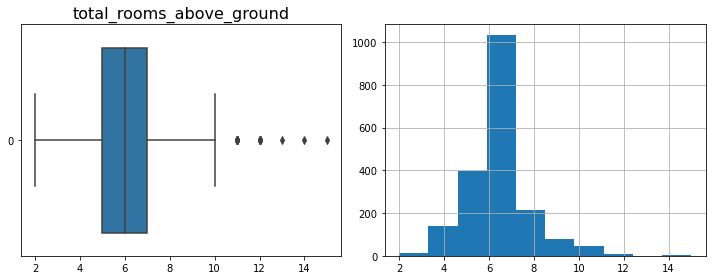

In [573]:
#visualising 'bedroom_above_ground_num'
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
ax = sns.boxplot(data=df['total_rooms_above_ground'], orient='h').set_title(
    'total_rooms_above_ground',fontsize=16)

plt.subplot(1,2,2)
df['total_rooms_above_ground'].hist()

plt.tight_layout()

In [574]:
# Merging total_rooms_above_ground into 3 groups: 5 and below, 6, 7, 8 and above
def total_rooms_above_ground_renum(x): 
    if x <= 5 :
        return 'five'
    elif x == 6: 
        return 'six'
    elif x == 7:
        return 'seven'
    elif x >= 8:
        return 'eight'

#mapping bathroom_above_ground_full_num
df['total_rooms_above_ground'] = df['total_rooms_above_ground'].map(total_rooms_above_ground_renum)

In [575]:
#checking mapping results
df['total_rooms_above_ground'].value_counts()

six      586
five     552
seven    446
eight    353
Name: total_rooms_above_ground, dtype: int64

In [576]:
#dummifying ''total_rooms_above_ground'' 
df = pd.concat([df, pd.get_dummies(df[['total_rooms_above_ground']], drop_first = False)], axis=1) #4 columns created

In [577]:
#checking newly created columns
df.columns

Index(['sale_zoning', 'street_connected_length', 'lot_area',
       'lot_shape_regularity', 'lot_config', 'neighborhood_location',
       'house_style', 'house_quality', 'house_condition', 'year_built',
       'year_remodelled', 'roof_style', 'exterior_material_1',
       'exterior_material_2', 'masonry_material', 'exterior_build_quality',
       'foundation_type', 'basement_height_quality',
       'basement_exposure_rating', 'basement_finished_rating',
       'basement_unfinished_area', 'basement_total_area',
       'heating_quality_condition', 'first_floor_area', 'above_ground_area',
       'bathroom_above_ground_full_num', 'bedroom_above_ground_num',
       'kitchen_quality_ord', 'total_rooms_above_ground', 'garage_location',
       'garage_built_year', 'garage_finish_quality', 'garage_size_num_cars',
       'garage_size_area', 'month_sold', 'year_sold', 'sale_price',
       'age_built', 'age_remodelled', 'has_remodelled', 'garage_age',
       'garage_location_0', 'garage_location_A

## Exploring kitchen_quality_ord

In [578]:
#checking for nulls
df['kitchen_quality_ord'].isnull().sum() #no nulls

0

In [579]:
df['kitchen_quality_ord'].value_counts()

TA    1030
Gd     777
Ex      87
Fa      43
Name: kitchen_quality_ord, dtype: int64

To regroup into 2 categories - average and below, above average, with an numeric score

In [580]:
# Regroup'kitchen_quality_ord' into 2 categories: average and below average (0), above average (1) 
# and create new column, is_good_kitchen_quality
def is_good_kitchen_quality_renum(x): 
    if 'Po' in str(x):
        return 0
    elif 'Fa' in str(x):
        return 0
    elif 'TA' in str(x):
        return 0
    elif 'Gd' in str(x):
        return 1
    elif 'Ex' in str(x):
        return 1

#mapping bathroom_above_ground_full_num
df['is_good_kitchen_quality'] = df['kitchen_quality_ord'].map(is_good_kitchen_quality_renum)

In [581]:
#checking newly created column
df['is_good_kitchen_quality'].value_counts()

0    1073
1     864
Name: is_good_kitchen_quality, dtype: int64

## Exploring heating_quality_condition

In [582]:
#checking for nulls
df['heating_quality_condition'].isnull().sum() #no nulls

0

In [583]:
df['heating_quality_condition'].value_counts()

Ex    977
TA    586
Gd    309
Fa     63
Po      2
Name: heating_quality_condition, dtype: int64

To regroup into 2 categories - average and below, above average, with an numeric score, and create a new column called 'is_good_heating_quality_condition'.

In [584]:
# Regroup'heating_quality_condition' into 2 categories: average and below average (0), above average (1) 
# and create a new column called 'is_good_heating_quality'
def is_good_heating_quality_renum(x): 
    if 'Po' in str(x):
        return 0
    elif 'Fa' in str(x):
        return 0
    elif 'TA' in str(x):
        return 0
    elif 'Gd' in str(x):
        return 1
    elif 'Ex' in str(x):
        return 1

#mapping bathroom_above_ground_full_num
df['is_good_heating_quality'] = df['heating_quality_condition'].map(is_good_heating_quality_renum)

In [585]:
#checking values of new column
df['is_good_heating_quality'].value_counts()

1    1286
0     651
Name: is_good_heating_quality, dtype: int64

## Exploring exterior build quality

In [586]:
df['exterior_build_quality'].isnull().sum() #no nulls

0

In [587]:
df['exterior_build_quality'].value_counts()

TA    1231
Gd     653
Ex      34
Fa      19
Name: exterior_build_quality, dtype: int64

There are no properties with 'Poor' under this category. To regroup into 2 categories - average and below, above average, with an numeric score, and create a new column called 'is_good_exterior_build_quality'.

In [588]:
# Regroup'exterior_build_quality' into 2 categories: average and below average (0), above average (1) 
# and create a new column called 'is_good_exterior_build_quality'
def is_good_exterior_build_quality_renum(x): 
    if 'Po' in str(x):
        return 0
    elif 'Fa' in str(x):
        return 0
    elif 'TA' in str(x):
        return 0
    elif 'Gd' in str(x):
        return 1
    elif 'Ex' in str(x):
        return 1

#mapping bathroom_above_ground_full_num
df['is_good_exterior_build_quality'] = df['exterior_build_quality'].map(is_good_exterior_build_quality_renum)

In [589]:
#checking results of new column
df['is_good_exterior_build_quality'].value_counts()

0    1250
1     687
Name: is_good_exterior_build_quality, dtype: int64

## Exploring 'house_quality' and 'house_condition'


#### Checking 'house_quality

In [590]:
df['house_quality'].isnull().sum() #no nulls

0

In [591]:
df['house_quality'].value_counts()

5     559
6     505
7     430
8     220
4     150
9      35
3      24
2       7
10      5
1       2
Name: house_quality, dtype: int64

To regroup into 2 categories - average and below, above average, with an numeric score, and create a new column called 'is_good_house_quality'.

In [592]:
# Regroup'house_quality' into 2 categories: average and below average (0), above average (1) 
# and create a new column called 'is_good_house_quality'
def is_good_house_quality_renum(x): 
    if x <= 5:
        return 0
    elif x >=6:
        return 1

#mapping house_quality columnn
df['is_good_house_quality'] = df['house_quality'].map(is_good_house_quality_renum)

In [593]:
#checking newly created column
df['is_good_house_quality'].value_counts()

1    1195
0     742
Name: is_good_house_quality, dtype: int64

#### Checking house_condition

In [594]:
df['house_condition'].isnull().sum() #no nulls

0

In [595]:
df['house_quality'].value_counts()

5     559
6     505
7     430
8     220
4     150
9      35
3      24
2       7
10      5
1       2
Name: house_quality, dtype: int64

To regroup into 2 categories - average and below, and above average, with an dummy score, and create a new column called 'is_good_house_condition'.

In [596]:
# Regroup'house_condition' into 2 categories: average and below average (0), and above average (1) 
# and create a new column called 'is_good_house_condition'
def is_good_house_condition_renum(x): 
    if x <= 5:
        return 0
    elif x >=6:
        return 1

#mapping house_condition columnn
df['is_good_house_condition'] = df['house_condition'].map(is_good_house_condition_renum)

In [597]:
#checking newly created column
df['is_good_house_condition'].value_counts()

0    1184
1     753
Name: is_good_house_condition, dtype: int64

## Exploring masonry material

In [598]:
df['masonry_material'].isnull().sum() #20 null values

20

In [599]:
df['masonry_material'].value_counts()

None       1186
BrkFace     584
Stone       134
BrkCmn       13
Name: masonry_material, dtype: int64

In [600]:
#exploring null rows
df[df['masonry_material'].isnull()]

,sale_zoning,street_connected_length,lot_area,lot_shape_regularity,lot_config,neighborhood_location,house_style,house_quality,house_condition,year_built,...,bedroom_above_ground_num_two,total_rooms_above_ground_eight,total_rooms_above_ground_five,total_rooms_above_ground_seven,total_rooms_above_ground_six,is_good_kitchen_quality,is_good_heating_quality,is_good_exterior_build_quality,is_good_house_quality,is_good_house_condition
86,RL,67.0,10083,Reg,Inside,SawyerW,1Story,7,5,2003,...,1,0,1,0,0,1,1,1,1,0
212,FV,90.0,7993,IR1,Inside,Somerst,1Story,7,5,2008,...,0,0,0,0,1,1,1,1,1,0
276,RL,75.0,8050,Reg,Inside,Edwards,1Story,6,5,2002,...,1,0,1,0,0,1,1,0,1,0
338,FV,112.0,12217,IR1,Inside,Somerst,2Story,8,5,2007,...,0,1,0,0,0,1,1,1,1,0
431,RL,75.0,9473,Reg,Inside,CollgCr,2Story,8,5,2002,...,0,0,0,1,0,1,1,1,1,0
451,RL,87.0,10037,Reg,Corner,Somerst,1Story,8,5,2006,...,0,0,0,0,1,1,1,1,1,0
591,FV,35.0,4274,IR1,Inside,Somerst,1Story,7,5,2006,...,1,0,1,0,0,1,1,1,1,0
844,FV,30.0,5330,IR2,Inside,Somerst,1Story,8,5,2006,...,1,0,1,0,0,1,1,1,1,0
913,RL,NaN,32668,IR1,CulDSac,Crawfor,1Story,6,3,1957,...,0,1,0,0,0,0,0,1,1,0
939,FV,95.0,11639,Reg,Corner,Somerst,1Story,7,5,2007,...,0,0,0,0,1,1,1,1,1,0


In [601]:
#replace null values with None, which is the most common value
df.loc[df['masonry_material'].isnull(),'masonry_material'] = 'None'


In [602]:
#checking null has been substituted
df[df['masonry_material'].isnull()] #no more null values

,sale_zoning,street_connected_length,lot_area,lot_shape_regularity,lot_config,neighborhood_location,house_style,house_quality,house_condition,year_built,...,bedroom_above_ground_num_two,total_rooms_above_ground_eight,total_rooms_above_ground_five,total_rooms_above_ground_seven,total_rooms_above_ground_six,is_good_kitchen_quality,is_good_heating_quality,is_good_exterior_build_quality,is_good_house_quality,is_good_house_condition


In [603]:
#dummifying 'masonry_material' 
df = pd.concat([df, pd.get_dummies(df[['masonry_material']], drop_first = False)], axis=1) #4 columns added

In [604]:
#checking newly created columns
df.columns

Index(['sale_zoning', 'street_connected_length', 'lot_area',
       'lot_shape_regularity', 'lot_config', 'neighborhood_location',
       'house_style', 'house_quality', 'house_condition', 'year_built',
       'year_remodelled', 'roof_style', 'exterior_material_1',
       'exterior_material_2', 'masonry_material', 'exterior_build_quality',
       'foundation_type', 'basement_height_quality',
       'basement_exposure_rating', 'basement_finished_rating',
       'basement_unfinished_area', 'basement_total_area',
       'heating_quality_condition', 'first_floor_area', 'above_ground_area',
       'bathroom_above_ground_full_num', 'bedroom_above_ground_num',
       'kitchen_quality_ord', 'total_rooms_above_ground', 'garage_location',
       'garage_built_year', 'garage_finish_quality', 'garage_size_num_cars',
       'garage_size_area', 'month_sold', 'year_sold', 'sale_price',
       'age_built', 'age_remodelled', 'has_remodelled', 'garage_age',
       'garage_location_0', 'garage_location_A

## Exploring exterior_material_1 and exterior_material_2 

In [605]:
df['exterior_material_1'].isnull().sum() #no nulls
df['exterior_material_2'].isnull().sum() #no nulls

0

In [606]:
df['exterior_material_1'].value_counts()

VinylSd    664
MetalSd    315
HdBoard    300
Wd Sdng    268
Plywood    150
CemntBd     73
BrkFace     59
WdShing     43
AsbShng     30
Stucco      27
BrkComm      3
Stone        2
ImStucc      1
CBlock       1
AsphShn      1
Name: exterior_material_1, dtype: int64

In [607]:
df['exterior_material_2'].value_counts()

VinylSd    659
MetalSd    307
HdBoard    275
Wd Sdng    252
Plywood    184
CmentBd     74
Wd Shng     60
BrkFace     31
Stucco      30
AsbShng     26
Brk Cmn     17
ImStucc     11
Stone        6
AsphShn      3
CBlock       2
Name: exterior_material_2, dtype: int64

In [608]:
(df['exterior_material_1'] != df['exterior_material_2']).sum()/len(df) #0.15178110480123902

0.15178110480123902

For most (around 85%) properties, external_material_1 is the same as external_material_2. There will be very high correlation between the two. In that case we will simply use 'external_material_1' column. 

In [609]:
df['exterior_material_1'].value_counts()

VinylSd    664
MetalSd    315
HdBoard    300
Wd Sdng    268
Plywood    150
CemntBd     73
BrkFace     59
WdShing     43
AsbShng     30
Stucco      27
BrkComm      3
Stone        2
ImStucc      1
CBlock       1
AsphShn      1
Name: exterior_material_1, dtype: int64

In [610]:
# Regroup'exterior_material_1' categories with less than 100 counts into 1 category: all_others
def exterior_material_1_renum(x): 
    to_group = ['CemntBd', 'BrkFace', 'WdShing', 'AsbShng', 'Stucco', 'BrkComm', 'Stone', 'ImStucc', 'CBlock', 'AsphShn']
    if x in to_group:
        return 'all_others'
    else:
        return x

#mapping exterior_material_1
df['exterior_material_1'] = df['exterior_material_1'].map(exterior_material_1_renum)

In [611]:
#checking mapping results
df['exterior_material_1'].value_counts()

VinylSd       664
MetalSd       315
HdBoard       300
Wd Sdng       268
all_others    240
Plywood       150
Name: exterior_material_1, dtype: int64

In [612]:
#dummifying 'exterior_material_1' column
df = pd.concat([df, pd.get_dummies(df[['exterior_material_1']], drop_first = False)], axis=1) #6 columns added

In [613]:
#checking newly created columns
df.columns

Index(['sale_zoning', 'street_connected_length', 'lot_area',
       'lot_shape_regularity', 'lot_config', 'neighborhood_location',
       'house_style', 'house_quality', 'house_condition', 'year_built',
       'year_remodelled', 'roof_style', 'exterior_material_1',
       'exterior_material_2', 'masonry_material', 'exterior_build_quality',
       'foundation_type', 'basement_height_quality',
       'basement_exposure_rating', 'basement_finished_rating',
       'basement_unfinished_area', 'basement_total_area',
       'heating_quality_condition', 'first_floor_area', 'above_ground_area',
       'bathroom_above_ground_full_num', 'bedroom_above_ground_num',
       'kitchen_quality_ord', 'total_rooms_above_ground', 'garage_location',
       'garage_built_year', 'garage_finish_quality', 'garage_size_num_cars',
       'garage_size_area', 'month_sold', 'year_sold', 'sale_price',
       'age_built', 'age_remodelled', 'has_remodelled', 'garage_age',
       'garage_location_0', 'garage_location_A

## Exploring foundation_type

In [614]:
df['foundation_type'].isnull().sum() #no nulls

0

In [615]:
df['foundation_type'].value_counts()

CBlock    846
PConc     839
BrkTil    215
Slab       32
Stone       3
Wood        2
Name: foundation_type, dtype: int64

In [616]:
# Regroup'foundation_type' types 'BrkTil', Slab','Stone','Wood' into one category as they have relatively few values
def foundation_type_renum(x): 
    to_group = ['BrkTil', 'Slab','Stone','Wood' ]
    if x in to_group:
        return 'all_others'
    else:
        return x

#mapping exterior_material_1
df['foundation_type'] = df['foundation_type'].map(foundation_type_renum)

In [617]:
#checking that all_others created
df['foundation_type'].value_counts()

CBlock        846
PConc         839
all_others    252
Name: foundation_type, dtype: int64

In [618]:
#dummifying 'foundation_type' column
df = pd.concat([df, pd.get_dummies(df[['foundation_type']], drop_first = False)], axis=1) #3 columns added

In [619]:
#checking newly created columns
df.columns

Index(['sale_zoning', 'street_connected_length', 'lot_area',
       'lot_shape_regularity', 'lot_config', 'neighborhood_location',
       'house_style', 'house_quality', 'house_condition', 'year_built',
       'year_remodelled', 'roof_style', 'exterior_material_1',
       'exterior_material_2', 'masonry_material', 'exterior_build_quality',
       'foundation_type', 'basement_height_quality',
       'basement_exposure_rating', 'basement_finished_rating',
       'basement_unfinished_area', 'basement_total_area',
       'heating_quality_condition', 'first_floor_area', 'above_ground_area',
       'bathroom_above_ground_full_num', 'bedroom_above_ground_num',
       'kitchen_quality_ord', 'total_rooms_above_ground', 'garage_location',
       'garage_built_year', 'garage_finish_quality', 'garage_size_num_cars',
       'garage_size_area', 'month_sold', 'year_sold', 'sale_price',
       'age_built', 'age_remodelled', 'has_remodelled', 'garage_age',
       'garage_location_0', 'garage_location_A

## Exploring house_style

In [620]:
df['house_style'].isnull().sum() #1 null value

0

In [621]:
df[df['house_style'].isnull()].isnull().sum() #all null fields - to remove row

sale_zoning                       0.0
street_connected_length           0.0
lot_area                          0.0
lot_shape_regularity              0.0
lot_config                        0.0
                                 ... 
exterior_material_1_Wd Sdng       0.0
exterior_material_1_all_others    0.0
foundation_type_CBlock            0.0
foundation_type_PConc             0.0
foundation_type_all_others        0.0
Length: 71, dtype: float64

As this row comprises of null values only, this row is to be removed.

In [622]:
df.drop(df[df['house_style'].isnull()].index, inplace=True)

In [623]:
#checking null row has been dropped
df['house_style'].isnull().sum()

0

In [624]:
df['house_style'].value_counts()

1Story    995
2Story    559
1.5Fin    211
SLvl       93
SFoyer     50
2.5Unf     13
1.5Unf     11
2.5Fin      5
Name: house_style, dtype: int64

In [625]:
# Regroup'house_style' types into 1 Storey and more than 1 storey, and add new column 'more_than_1_storey'
def house_style_renum(x): 
    if '1Story' in x:
        return 0
    else:
        return 1

#mapping 'house_style'
df['more_than_1_storey'] = df['house_style'].map(house_style_renum)

In [626]:
#checking results of mapping
df['more_than_1_storey'].value_counts() 

0    995
1    942
Name: more_than_1_storey, dtype: int64

## Exploring sale_zoning

In [627]:
df['sale_zoning'].value_counts()

RL    1511
RM     313
FV      99
RH      14
Name: sale_zoning, dtype: int64

Given there are only 13 RH (Residential High Density) values, we will subsume them into its likely closest property type, RM (Residential Medium Density).

In [628]:
# Subsume RH into RM as RH has relatively few values
def sale_zoning_renum(x): 
    if x == 'RH':
        return 'RM'
    else:
        return x

#mapping 
df['sale_zoning'] = df['sale_zoning'].map(sale_zoning_renum)

In [629]:
#check results of mapping
df['sale_zoning'].value_counts() #ok

RL    1511
RM     327
FV      99
Name: sale_zoning, dtype: int64

In [630]:
#dummifying 'sale_zoning' column
df = pd.concat([df, pd.get_dummies(df[['sale_zoning']], drop_first = False)], axis=1) #3 columns added

In [631]:
df.columns

Index(['sale_zoning', 'street_connected_length', 'lot_area',
       'lot_shape_regularity', 'lot_config', 'neighborhood_location',
       'house_style', 'house_quality', 'house_condition', 'year_built',
       'year_remodelled', 'roof_style', 'exterior_material_1',
       'exterior_material_2', 'masonry_material', 'exterior_build_quality',
       'foundation_type', 'basement_height_quality',
       'basement_exposure_rating', 'basement_finished_rating',
       'basement_unfinished_area', 'basement_total_area',
       'heating_quality_condition', 'first_floor_area', 'above_ground_area',
       'bathroom_above_ground_full_num', 'bedroom_above_ground_num',
       'kitchen_quality_ord', 'total_rooms_above_ground', 'garage_location',
       'garage_built_year', 'garage_finish_quality', 'garage_size_num_cars',
       'garage_size_area', 'month_sold', 'year_sold', 'sale_price',
       'age_built', 'age_remodelled', 'has_remodelled', 'garage_age',
       'garage_location_0', 'garage_location_A

## Exploring street_connected_length

In [632]:
df['street_connected_length'].isnull().sum() #no nulls

328

In [633]:
df['street_connected_length'].describe()

count    1609.000000
mean       67.906774
std        22.807408
min        21.000000
25%        57.000000
50%        67.000000
75%        80.000000
max       313.000000
Name: street_connected_length, dtype: float64

<AxesSubplot:>

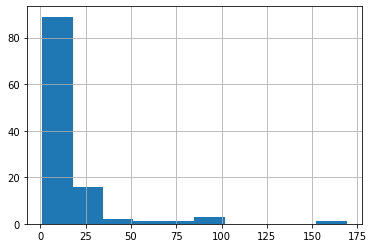

In [634]:
df['street_connected_length'].value_counts().hist()

## Exploring lot_area, lot_shape_regularity, lot_config

In [635]:
#checking for nulls
df['lot_area'].isnull().sum() #no nulls

0

In [636]:
df['lot_area'].describe()

count      1937.000000
mean       9829.577181
std        6589.830383
min        1300.000000
25%        7407.000000
50%        9272.000000
75%       11175.000000
max      159000.000000
Name: lot_area, dtype: float64

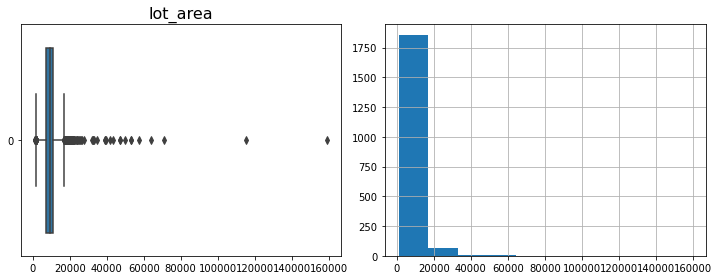

In [637]:
#visualising 'lot_area'
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
ax = sns.boxplot(data=df['lot_area'], orient='h').set_title(
    'lot_area',fontsize=16)

plt.subplot(1,2,2)
df['lot_area'].hist()

plt.tight_layout()

Looking at the box plot, there appear to be some outliers in lot area to the right.

In [641]:
#searching for outliers in lot_area +3sd
(df['lot_area'] > (df['lot_area'].mean() + 3*np.std(df['lot_area']))).sum() #20 values

20

There are 20 values of lot_area that are greater than 3sd that could affect the modelling. We will replace them with the mean value instead. 

In [642]:
df.loc[df['lot_area'] > (df['lot_area'].mean() + 3*np.std(df['lot_area'])), 'lot_area'] = df['lot_area'].mean()

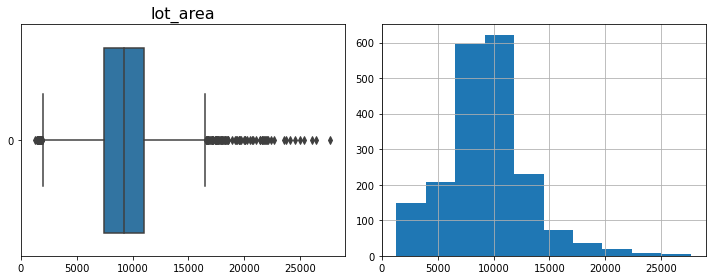

In [643]:
#visualising 'lot_area' again
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
ax = sns.boxplot(data=df['lot_area'], orient='h').set_title(
    'lot_area',fontsize=16)

plt.subplot(1,2,2)
df['lot_area'].hist()

plt.tight_layout()

Far right outliers are gone.

#### Exploring lot_shape_regularity

In [645]:
#checking for nulls
df['lot_shape_regularity'].isnull().sum() #no nulls

0

In [646]:
df['lot_shape_regularity'].value_counts()

Reg    1238
IR1     640
IR2      50
IR3       9
Name: lot_shape_regularity, dtype: int64

There are only a few values in IR2 and IR3. To merge with IR1 and regroup 'lot_shape_regularity' into whether regular or not (is_reg_lot_shape)

In [647]:
# Regroup 'lot_shape_regularity' into whether or regular or not, and add new column 'is_reg_lot_shape'
def lot_shape_regularity_renum(x): 
    if x == 'Reg':
        return 1
    else:
        return 0

#mapping 
df['is_reg_lot_shape'] = df['lot_shape_regularity'].map(lot_shape_regularity_renum)

In [648]:
#checking newly created column
df['is_reg_lot_shape'].value_counts() #ok

1    1238
0     699
Name: is_reg_lot_shape, dtype: int64

#### Exploring lot_config

In [649]:
#checking for nulls
df['lot_config'].isnull().sum() #no nulls

0

In [650]:
df['lot_config'].value_counts()

Inside     1425
Corner      327
CulDSac     117
FR2          59
FR3           9
Name: lot_config, dtype: int64

To merge FR2 and FR3, which have relatively few values, into a new value called FR

In [651]:
# To merge FR2 and FR3, which have relatively few values, into a new value called FR
def lot_config_renum(x): 
    if x == 'FR2':
        return 'FR'
    elif x == 'FR3':
        return 'FR'
    else:
        return x

#mapping 
df['lot_config'] = df['lot_config'].map(lot_config_renum)

In [652]:
#checking results of mapping
df['lot_config'].value_counts() #ok

Inside     1425
Corner      327
CulDSac     117
FR           68
Name: lot_config, dtype: int64

In [653]:
#dummifying 'lot_config' column
df = pd.concat([df, pd.get_dummies(df[['lot_config']], drop_first = False)], axis=1) #4 columns added

In [654]:
#checking newly created columns
df.columns

Index(['sale_zoning', 'street_connected_length', 'lot_area',
       'lot_shape_regularity', 'lot_config', 'neighborhood_location',
       'house_style', 'house_quality', 'house_condition', 'year_built',
       'year_remodelled', 'roof_style', 'exterior_material_1',
       'exterior_material_2', 'masonry_material', 'exterior_build_quality',
       'foundation_type', 'basement_height_quality',
       'basement_exposure_rating', 'basement_finished_rating',
       'basement_unfinished_area', 'basement_total_area',
       'heating_quality_condition', 'first_floor_area', 'above_ground_area',
       'bathroom_above_ground_full_num', 'bedroom_above_ground_num',
       'kitchen_quality_ord', 'total_rooms_above_ground', 'garage_location',
       'garage_built_year', 'garage_finish_quality', 'garage_size_num_cars',
       'garage_size_area', 'month_sold', 'year_sold', 'sale_price',
       'age_built', 'age_remodelled', 'has_remodelled', 'garage_age',
       'garage_location_0', 'garage_location_A

## Exploring neighborhood_location 

In [655]:
df['neighborhood_location'].isnull().sum() # no nulls

0

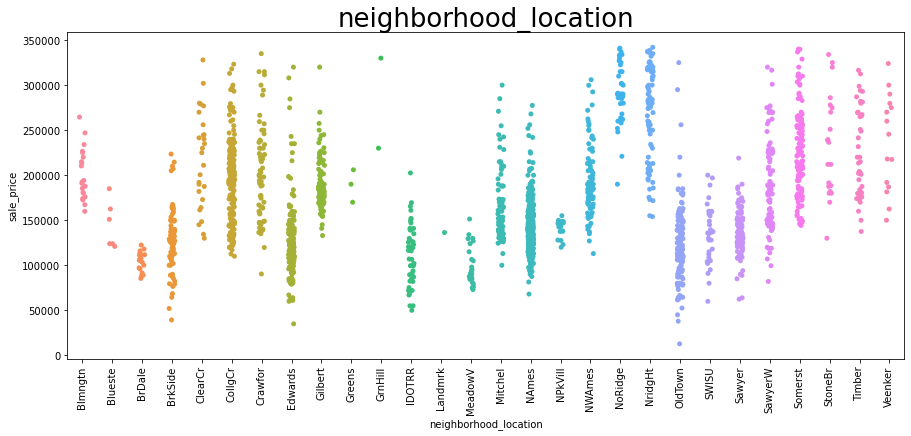

In [656]:
fig, ax = plt.subplots(figsize=(15,6))

sns.stripplot(x = df['neighborhood_location'], y = df['sale_price'], order = np.sort(df['neighborhood_location'].unique()))
plt.title('neighborhood_location', fontsize=26)
plt.xticks(rotation=90)
plt.show()

While location is an important factor affecting sale prices, there are a lot of neighborhood locations in this variable, and there is too much overlap in sale price, which makes this an unsuitable variable to use directly for analysis.  

## Creating a composite score from binary columns
Each property likely has its own unique combination of features, and adding up the binary columns to create a composite score is an attempt to create a variable that reflects such a combination.

In [657]:
c = df.columns[df.isin([0,1]).all()]
binary = []
for item in c:
    binary.append(item)
binary

['has_remodelled',
 'garage_location_0',
 'garage_location_Attchd',
 'garage_location_Detchd',
 'garage_location_others',
 'more_than_2_above_bathrooms',
 'bedroom_above_ground_num_four',
 'bedroom_above_ground_num_three',
 'bedroom_above_ground_num_two',
 'total_rooms_above_ground_eight',
 'total_rooms_above_ground_five',
 'total_rooms_above_ground_seven',
 'total_rooms_above_ground_six',
 'is_good_kitchen_quality',
 'is_good_heating_quality',
 'is_good_exterior_build_quality',
 'is_good_house_quality',
 'is_good_house_condition',
 'masonry_material_BrkCmn',
 'masonry_material_BrkFace',
 'masonry_material_None',
 'masonry_material_Stone',
 'exterior_material_1_HdBoard',
 'exterior_material_1_MetalSd',
 'exterior_material_1_Plywood',
 'exterior_material_1_VinylSd',
 'exterior_material_1_Wd Sdng',
 'exterior_material_1_all_others',
 'foundation_type_CBlock',
 'foundation_type_PConc',
 'foundation_type_all_others',
 'more_than_1_storey',
 'sale_zoning_FV',
 'sale_zoning_RL',
 'sale_zonin

In [658]:
df['comp_score'] = df[binary].sum(axis=1)
df['comp_score'].value_counts()

12.0    339
13.0    338
14.0    333
11.0    301
15.0    259
10.0    184
16.0    103
9.0      69
8.0       6
17.0      5
Name: comp_score, dtype: int64

In [660]:
#full list of columns
df.columns

Index(['sale_zoning', 'street_connected_length', 'lot_area',
       'lot_shape_regularity', 'lot_config', 'neighborhood_location',
       'house_style', 'house_quality', 'house_condition', 'year_built',
       'year_remodelled', 'roof_style', 'exterior_material_1',
       'exterior_material_2', 'masonry_material', 'exterior_build_quality',
       'foundation_type', 'basement_height_quality',
       'basement_exposure_rating', 'basement_finished_rating',
       'basement_unfinished_area', 'basement_total_area',
       'heating_quality_condition', 'first_floor_area', 'above_ground_area',
       'bathroom_above_ground_full_num', 'bedroom_above_ground_num',
       'kitchen_quality_ord', 'total_rooms_above_ground', 'garage_location',
       'garage_built_year', 'garage_finish_quality', 'garage_size_num_cars',
       'garage_size_area', 'month_sold', 'year_sold', 'sale_price',
       'age_built', 'age_remodelled', 'has_remodelled', 'garage_age',
       'garage_location_0', 'garage_location_A

In [662]:
#checking total number of cols in df
len(df.columns) #81

81

In [663]:
#ranking the abs value of the correlation of the variables with sale_price
abs(df.corr()['sale_price']).sort_values(ascending = False).head(20)    

sale_price                        1.000000
house_quality                     0.780124
above_ground_area                 0.652407
is_good_exterior_build_quality    0.645930
garage_size_num_cars              0.623357
comp_score                        0.617828
garage_size_area                  0.609515
is_good_kitchen_quality           0.605511
year_built                        0.591732
age_built                         0.591229
is_good_house_quality             0.584831
age_remodelled                    0.564479
year_remodelled                   0.563770
garage_finish_quality             0.559844
more_than_2_above_bathrooms       0.550720
bathroom_above_ground_full_num    0.549874
basement_total_area               0.543724
foundation_type_PConc             0.540558
first_floor_area                  0.532669
garage_location_Attchd            0.422204
Name: sale_price, dtype: float64

In [664]:
#creating list of variables with higher correlation with sale_price
higher_corr = []
for col in df.columns:
    try:
        if abs(df[col].corr(df['sale_price'])) > 0.5:
            higher_corr.append(col)
    except:
        pass
    
#checking columns in the list
higher_corr

['house_quality',
 'year_built',
 'year_remodelled',
 'basement_total_area',
 'first_floor_area',
 'above_ground_area',
 'bathroom_above_ground_full_num',
 'garage_finish_quality',
 'garage_size_num_cars',
 'garage_size_area',
 'sale_price',
 'age_built',
 'age_remodelled',
 'more_than_2_above_bathrooms',
 'is_good_kitchen_quality',
 'is_good_exterior_build_quality',
 'is_good_house_quality',
 'foundation_type_PConc',
 'comp_score']

In [666]:
#number of variables with higher correlation with sales price
len(higher_corr) #19

19

## Refining list of variables

1. Looking through the shortlisted variables, age_built and age_remodelled are strongly correlated with year_built and year_remodelled. 
* to drop year_built and year_remodelled

2. garage_size_area and garage_size_num_cars are strongly correlated, so we should drop one of them. As garage_size_num_cars has slightly higher correlation with sale_price, we will choose this to model with sale_price.

To drop:
* year_built
* garage_size_area

In [669]:
#checking corr between 'garage_size_num_cars', 'garage_size_area', 'sale_price'
df[['garage_size_num_cars', 'garage_size_area', 'sale_price']].corr() # garage_size_num_car has higher corr with sale_price

,garage_size_num_cars,garage_size_area,sale_price
garage_size_num_cars,1.000000,0.887729,0.623357
garage_size_area,0.887729,1.000000,0.609515
sale_price,0.623357,0.609515,1.000000


In [670]:
higher_corr_refined = ['house_quality',
  'year_remodelled',
 'basement_total_area',
 'first_floor_area',
 'above_ground_area',
 'bathroom_above_ground_full_num',
 'garage_finish_quality',
 'garage_size_num_cars',
 'sale_price',
 'age_built',
 'age_remodelled',
 'more_than_2_above_bathrooms',
 'is_good_kitchen_quality',
 'is_good_exterior_build_quality',
 'is_good_house_quality',
 'foundation_type_PConc', 'comp_score'] #17 variables

In [671]:
len(higher_corr_refined) #17

17

In [672]:
#creating a df of higher correlation variables
df_selected = df[higher_corr_refined]

<AxesSubplot:>

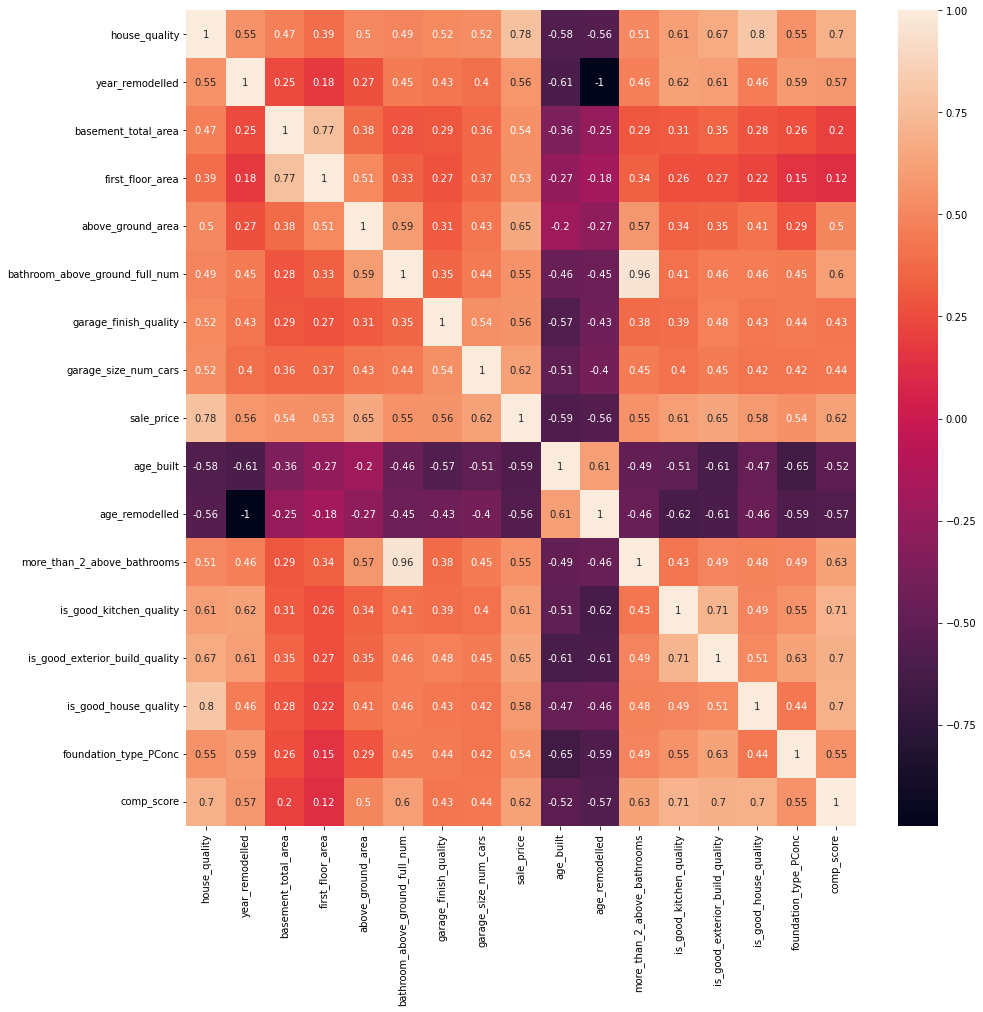

In [673]:
plt.figure(figsize=(15,15))
sns.heatmap(df_selected.corr(), annot=True)

## EDA - Boxplots

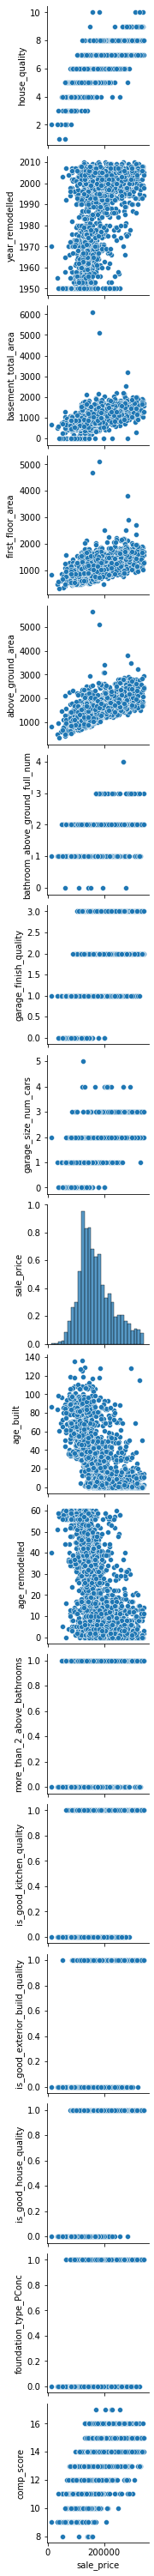

In [674]:
#pairplot of strongest variables
sns.pairplot(df_selected, y_vars=higher_corr_refined, x_vars=['sale_price'])

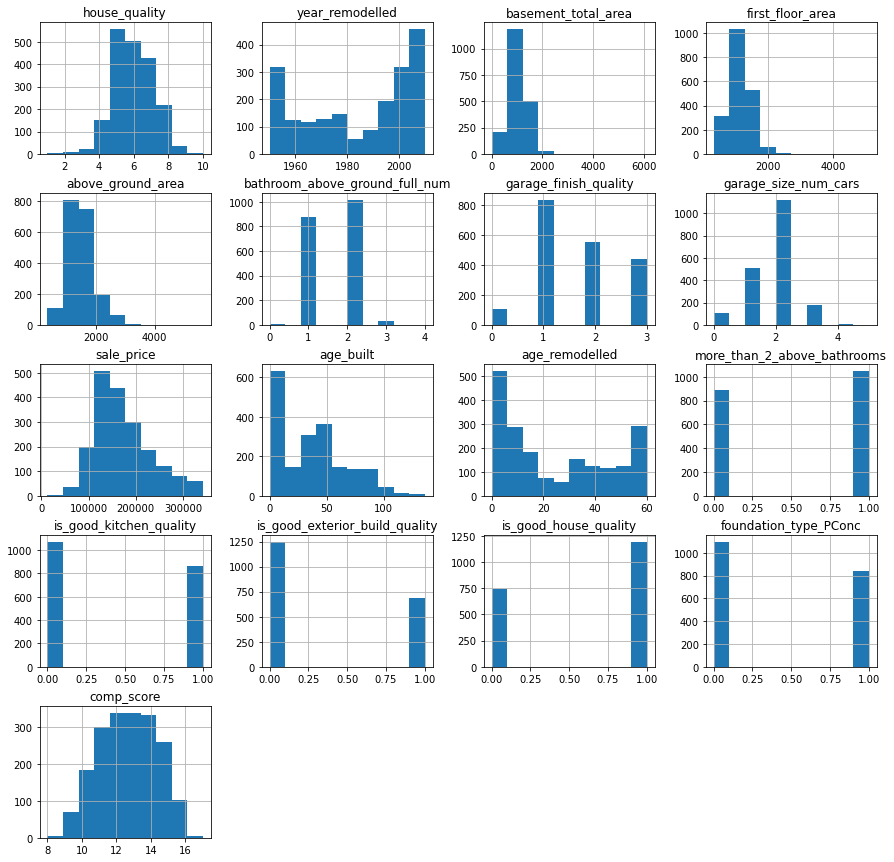

In [675]:
#histogram of all numeric variables
df_selected.hist(figsize=(15, 15));

C:\Users\yongl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sale_price'>

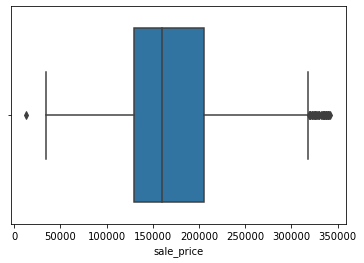

In [676]:
#boxplot of target variable, 'sale_price'
sns.boxplot(df_selected['sale_price'])

C:\Users\yongl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='above_ground_area'>

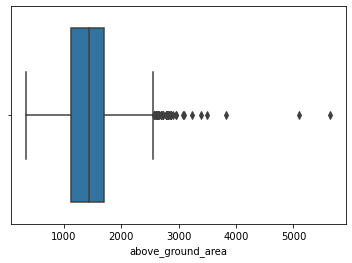

In [677]:
#box_plot of strongest predictor #above_ground_area
sns.boxplot(df_selected['above_ground_area'])

In [678]:
## Exporting selected data to csv
df_selected.to_csv('data/selected.csv', index = False)

Modeling of the sale_price variable to be done in another Jupyter notebook.

## End of Data Cleaning, EDA and Feature Engineering